In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### data generator
All of this is in nm

In [2]:
def fsr(lam, ng, L):
    """returns the spacing to the next FSR at higher wavelength from this one"""
    return lam**2 / (ng * L)

def Lorentzian(x,center, width, amp):
    """standard lorentzian function, creates that lineshape
    
    amplitude is integated into the function for resonance dip visibility"""
    wf = (width/2)
    
    height = amp * wf # normalise to height 1 then multiply by amplitude wanted
    denom = (np.pi)*(x-center)**2  + wf**2 
    return height* wf/denom


elemwise_lorentzian = np.vectorize(Lorentzian)

In [7]:
def res_in_range(offset,wavelength,ng,L):
    """function that creates a list of the centres of the FSR dips in a range, 
    offset changes where the first one will be placed, otherwise the first will be at 0."""
    pos = [offset+wavelength[0]]
    
    while pos[-1] <= wavelength[-1]:
        pos.append(fsr(pos[-1],ng,L)+pos[-1])
    else:
        return pos


def overlay_function(lam):
    """the spectrum the ring resonance dips subract from
    output in dBM, 
    created becasue this isnt always flat, can be a larger gaussian etc"""
    return 1
elemwise_overlay = np.vectorize(overlay_function)




def ring_res_sim(wavelength, FSR_width, visibility,first_res_offset,ng,L):
    """Simulates the spectrum of a ring resonator!
    generates the dips for all the resonances, and subtracts from the overlay function"""
    FSR_effect = np.zeros(wavelength.shape)
    
    for Ls in res_in_range(first_res_offset,wavelength,ng,L):
        FSR_effect = FSR_effect + Lorentzian(wavelength,Ls,FSR_width,visibility)  

    return overlay_function(wavelength) - FSR_effect

In [17]:
#sweep 
min_wav = 1545 
max_wav = 1555
resolution = 100

wavelength = np.linspace(min_wav,max_wav,resolution)

# ring variables
visibility = 0.8
FSR_width = 0.2
ng = 3.4
L= 180000
offset = -3


power =  ring_res_sim(wavelength,FSR_width,visibility,offset,ng,L)

<AxesSubplot:xlabel='wavelength', ylabel='p'>

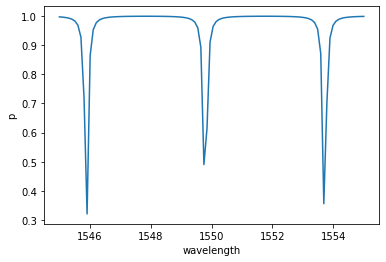

In [22]:
#turn numpy arrays into Panda data
data = pd.DataFrame(data = np.transpose(np.vstack((wavelength,power))), columns = ["wavelength","p"])

#save data to CSV
data.to_csv(f"simulated_ring_spectrum_{min_wav}-{max_wav}nm_L{L}_vis{visibility}_res{resolution}_offset{-3}")

#plot
sns.lineplot(data=data,x="wavelength",y="power")